# Movie Recommendation System



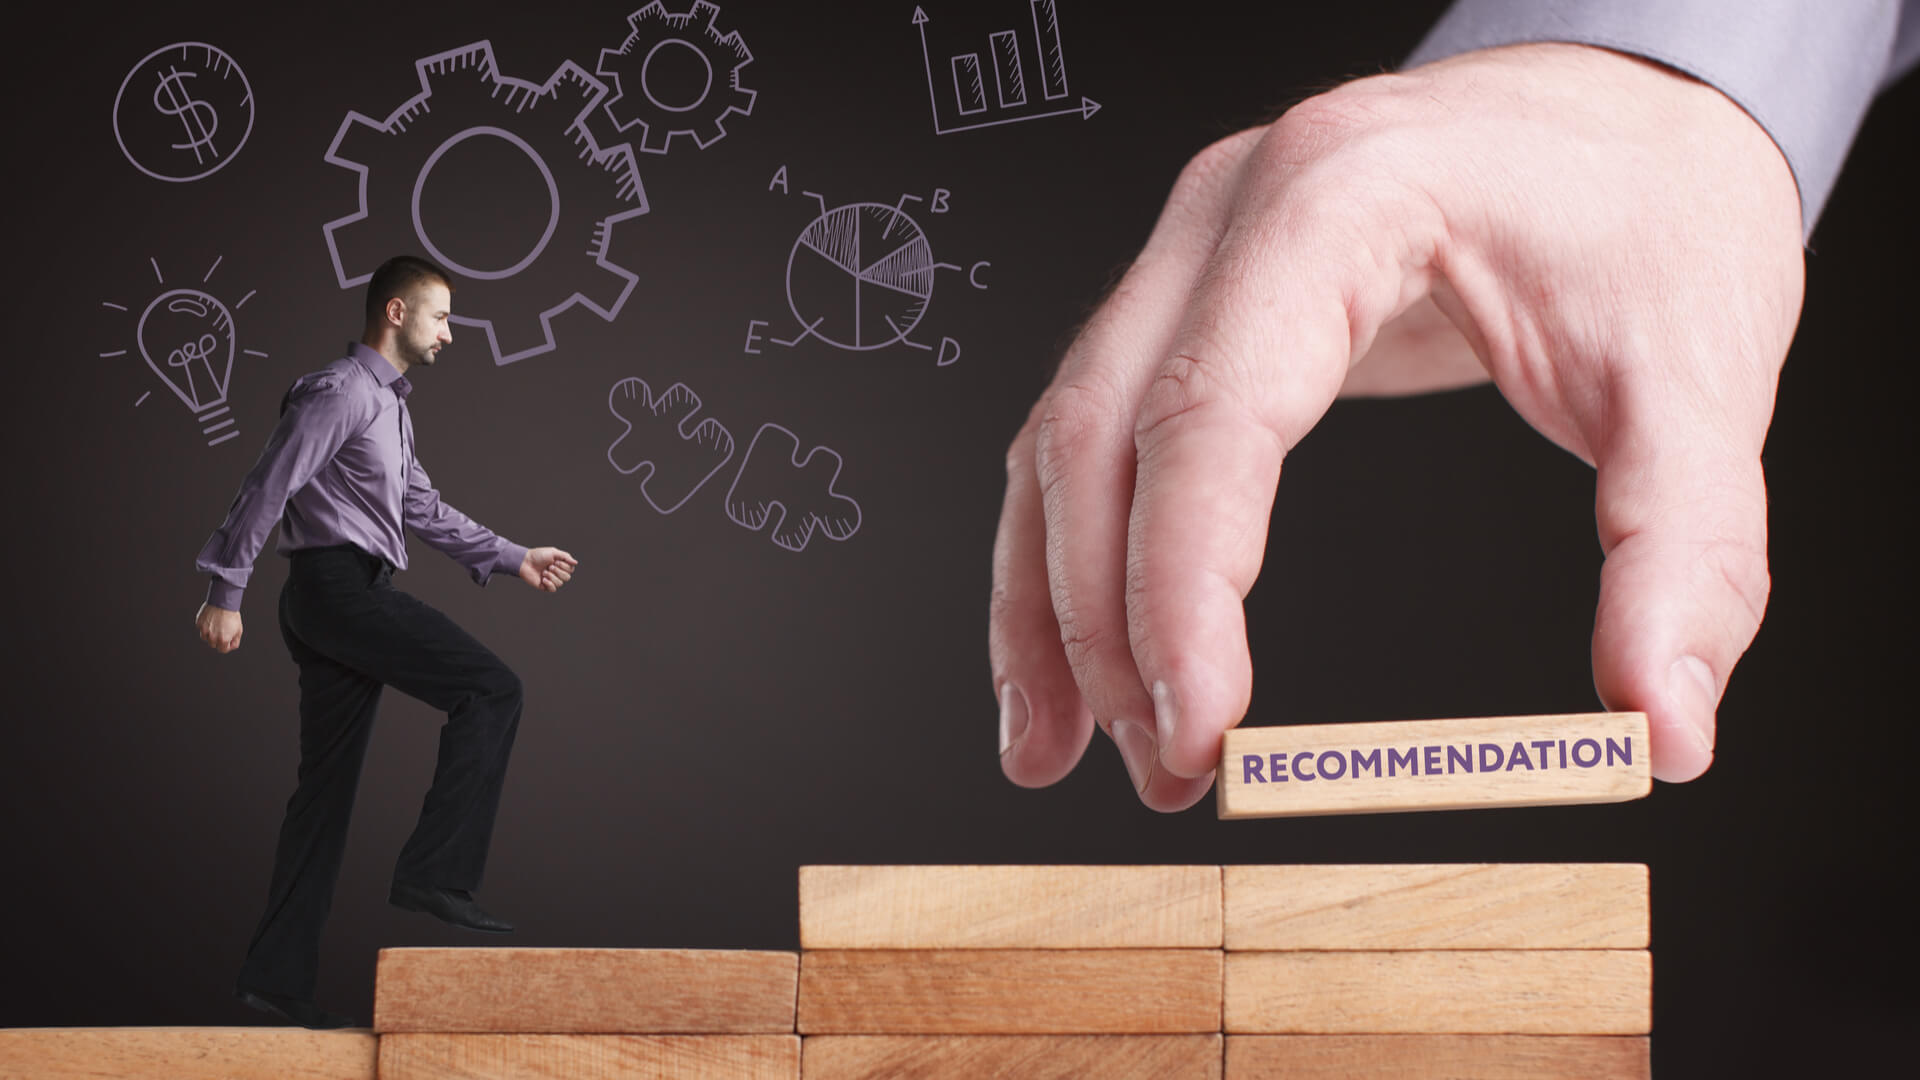

Its a software that analyzes available data to make suggestions for something that a website user might be interested in, such as a movie, a book or a job, among other possibilities.Recommendation engines use a variety of technologies and techniques that 
enable them to filter large amounts of data and provide a smaller, focused body of suggestions for the user.They are common 
among e-commerce, social media and content-based websites.Almost every major tech company has applied them in some form or the 
other.There are different type of recommender systems such as content-based, collaborative filtering, hybrid recommender system, demographic and keyword based recommender system. 

# Recommender systems-The need of the e-commerce Era

Recommender systems help the users to get personalized recommendations, helps users to take correct decisions in their online transactions, increase sales and redefine the users web browsing experience, retain the customers, enhance their shopping experience. Information overload problem is solved by search engines.


#### In this project we will be buliding a basic Movie Recommendation System.
#### The Data-Set used:TMDB 5000 Movie Data-Set

### Some of the basic types :

#### Demographic Filtering
Demographic filtering systems uses demographic information such as age, gender, education etc to identify the types of users that like a certain item.They offer generalized recommendations based on the features. 

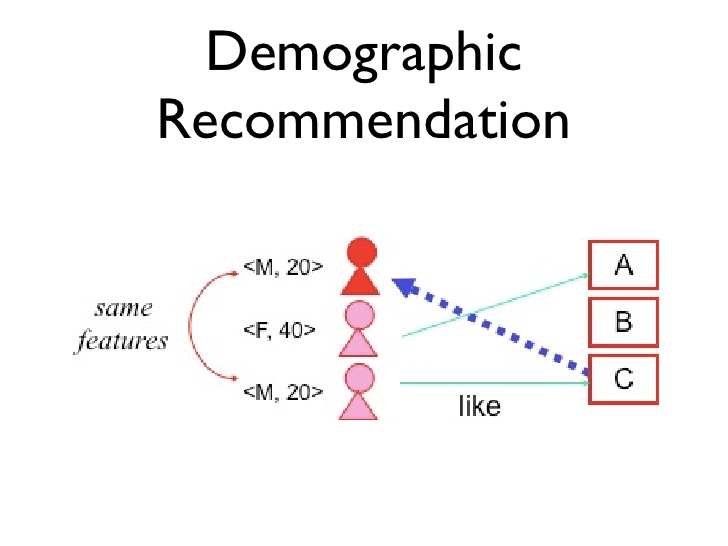

#### Content Based Filtering
Content-based filtering, also referred to as cognitive filtering, recommends items based on a comparison between the content of the items and a user profile.The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

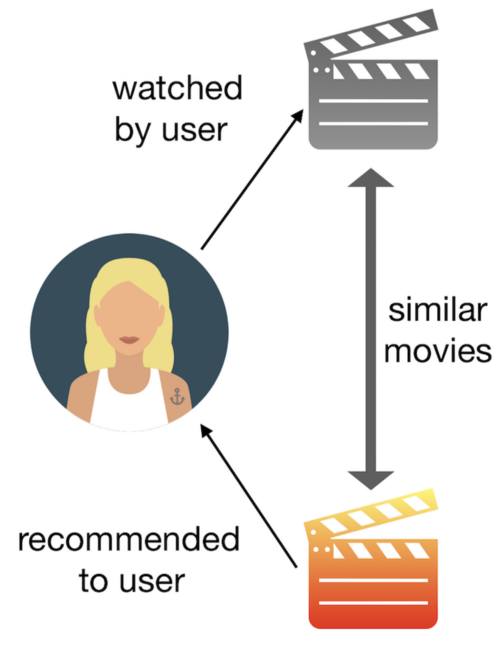

#### Collaborative Filtering
In this system,persons with similar interest are matched and recommendations are provided based on this matching.

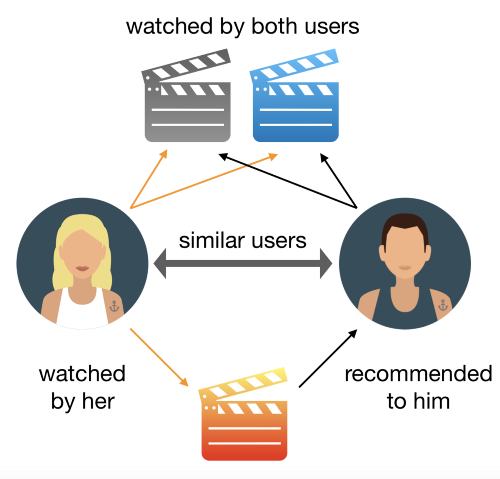

# Lets start Building


# Data Collection
Data collection is the process of gathering and measuring information on targeted variables in an established system, which then enables one to answer relevant questions and evaluate outcomes.<br>Here we use the TMDB 5000 Movie Data-Set.
#### Three CSV Files used:
1. tmdb_5000_credits.csv
2. tmdb_5000_movies.csv
3. ratings_small.csv

# Data preparation

Data preparation is the act of manipulating (or pre-processing) raw data (which may come from disparate data sources) into a form that can readily and accurately be analysed.<br>It includes many discrete tasks such as loading data or data ingestion, data fusion, data cleansing, data augmentation, data wrangling etc.

- ### Data Ingestion

Data ingestion is the process of obtaining and importing data for immediate use or storage in a database. 


- ### Data Fusion

Data fusion is the process of integrating multiple data sources to produce more consistent, accurate, and useful information than that provided by any individual data source.

- ### Data Cleansing

Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

- ### Data Augmentation

Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. 

- ### Data wrangling

Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes.

# Data Preparation for our project:

In this entire document the following abbrevations are used:
- pandas : pd
- numpy             : np
- matplotlib.pyplot : plt
- plotly.graph_objects : go
- plotly.express    : px
- seaborn           : sns


In [15]:
import pandas as pd 
import numpy as np 
tmdb_Credits=pd.read_csv('C:/Users/KEN/Downloads/tmdb_dataset/tmdb_5000_credits.csv')
tmdb_Movies=pd.read_csv('C:/Users/KEN/Downloads/tmdb_dataset/tmdb_5000_movies.csv')


#### Features of the data-set -tmdb_5000_credits:
 - movie_id - A unique identifier for each movie.
 - cast - The name of lead and supporting actors.
 - crew - The name of Director, Editor, Composer, Writer etc.

#### Features of the data-set -tmdb_5000_movies:

 - budget - The budget in which the movie was made.
 - genre - The genre of the movie, Action, Comedy ,Thriller etc.
 - homepage - A link to the homepage of the movie.
 - id - This is infact the movie_id as in the first dataset.
 - keywords - The keywords or tags related to the movie.
 - original_language - The language in which the movie was made.
 - original_title - The title of the movie before translation or adaptation.
 - overview - A brief description of the movie.
 - popularity - A numeric quantity specifying the movie popularity.
 - production_companies - The production house of the movie.
 - production_countries - The country in which it was produced.
 - release_date - The date on which it was released.
 - revenue - The worldwide revenue generated by the movie.
 - runtime - The running time of the movie in minutes.
 - status - "Released" or "Rumored".
 - tagline - Movie's tagline.
 - title - Title of the movie.
 - vote_average - average ratings the movie recieved.
 - vote_count - the count of votes recieved.

#### Join the two data-sets on the column 'id'

In [16]:
#change movie_id to id
tmdb_Credits.columns = ['id','tittle','cast','crew']
#merging the 2 datasets
tmdb_Movies= tmdb_Movies.merge(tmdb_Credits,on='id')

# Demographic Filtering



We need to rate the movie based on some condition or crieria.Recommendation for the user will be based on this.<br>We can use IMBD'S Weighted Rating(W) formula.

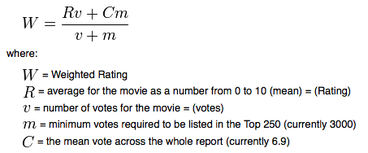

vote_count(v) feature and vote_average(R) feature is already present.We need to calculate C and m.<br>For calculating value of m we can set 90 percentile as the cutoff.A movie must have  more votes than at least 90% of the movies. 

In [17]:
C= tmdb_Movies['vote_average'].mean()
C

6.092171559442011

In [18]:
m= tmdb_Movies['vote_count'].quantile(0.9)
m

1838.4000000000015

##### Creating a dataframe with the filtered movies

In [19]:
q_movies = tmdb_Movies.copy().loc[tmdb_Movies['vote_count'] >= m]


#### The number of movies which got qualified:

In [20]:
q_movies.shape

(481, 23)

#### Function to calculate the weighted rating for each movie.

In [21]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)


#### A new feature 'score' is added,which is calculated by applying the above function on the qualified movies.

In [22]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

#### DataFrame being sorted according to the feature-'score'


In [23]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)



# Exploratory data analysis

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. 

 - ### Data Visualization

It involves the creation and study of the visual representation of data.To communicate information clearly and efficiently, data visualization uses statistical graphics, plots, information graphics and other tools. Numerical data may be encoded using dots, lines, bars etc., to visually communicate a quantitative message.

#### Different Types of graphs used for visualization
    

1. ##### Bar Graph 

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. 

2. ##### Line Graph

A line graph reveals trends or progress over time and can be used to show many different categories of data.

3. ##### Scatter Plot Chart

A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.

4. ##### Histogram

A histogram is an accurate representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable 


5. ##### Box plot

Boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles


6. ##### Pie chart

A pie chart is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice, is proportional to the quantity it represents. 

7. ##### Heat map

A heat map (or heatmap) is a graphical representation of data where the individual values contained in a matrix are represented as colors. 

#### According to the Popularity, the movies are sorted 

In [24]:
# Sorting in Descending Order
popularity= tmdb_Movies.sort_values('popularity', ascending=False)

#### Plotting a Bar Graph to depict he popularity of the movies. 

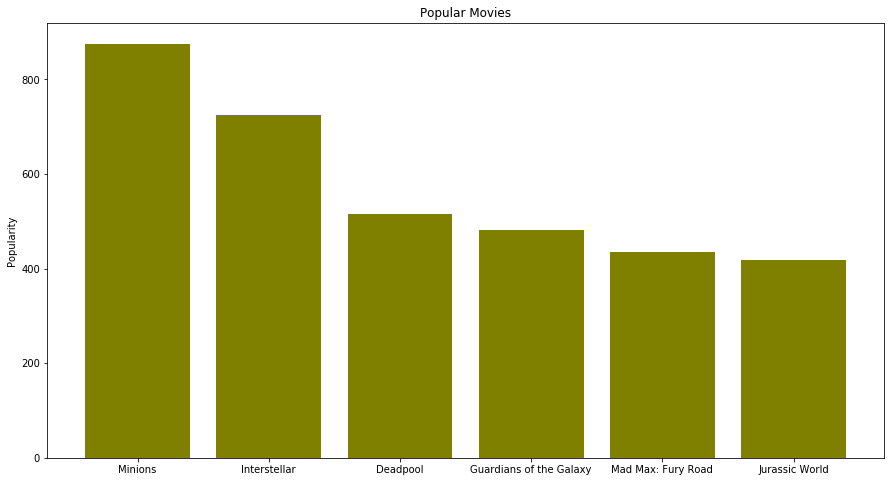

In [25]:
#Plot a bar graph with 'title' and 'popularity'
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

plt.bar(popularity['title'].head(6),popularity['popularity'].head(6), align='center',
        color='olive')
plt.ylabel("Popularity")
plt.title("Popular Movies")
plt.show()

# Content Based Filtering


The features of the movie are used to find the similarity between the movies.Based on the similarity, movies are recommended.

# Computation of Similarity:

## Correlation

It refers to a mutual relationship or association between quantities.Correlation is the first step to understanding these relationships and subsequently building better business and statistical models.

### Types of Correlation

#### Pearson correlation coefficient

It's a measure of the linear correlation between two variables X and Y. According to the Cauchy–Schwarz inequality it has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation. 

#### Spearman's rank correlation coefficient

It's a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function.

# Heat Map showing the correlation between the features

[Text(0.5, 0, 'budget'),
 Text(1.5, 0, 'id'),
 Text(2.5, 0, 'popularity'),
 Text(3.5, 0, 'revenue'),
 Text(4.5, 0, 'runtime'),
 Text(5.5, 0, 'vote_average'),
 Text(6.5, 0, 'vote_count')]

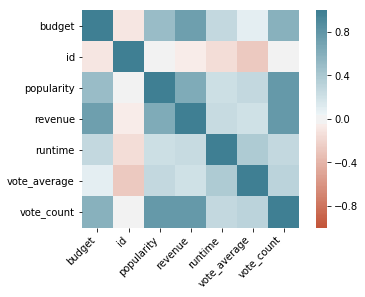

In [26]:
import seaborn as sns
corr = tmdb_Movies.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

#### Cosine similarity

Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. The cosine of two non-zero vectors can be derived by using the Euclidean dot product formula:




where Ai and Bi are components of vector **A and B** respectively.

# Similarity based on the 3 top actors, the director, related genres and the movie plot keywords.

## Conversion of string type features to objects: 

In [27]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval  

features = ['cast', 'crew', 'keywords', 'genres','production_companies']
for feature in features:
    tmdb_Movies[feature] = tmdb_Movies[feature].apply(literal_eval)

## Functions to extract required features:

In [28]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan



**Get the name of the Production Company**

In [29]:

def get_pclist(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        return names

**Return the list of top three actors**

In [30]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

**Define the new features:**

In [31]:
tmdb_Movies['director'] = tmdb_Movies['crew'].apply(get_director)
tmdb_Movies['production_companies']=tmdb_Movies['production_companies'].apply(get_pclist)
features = ['cast', 'keywords', 'genres']
for feature in features:
    tmdb_Movies[feature] = tmdb_Movies[feature].apply(get_list)

### Data Cleaning:
Convert the names and keyword instances into lowercase and strip all the spaces between them.

#### Function for Cleaning

In [32]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

**Apply the cleaning function to the required features.**

In [33]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres','production_companies']

for feature in features:
    tmdb_Movies[feature] = tmdb_Movies[feature].apply(clean_data)

### Metadata
Metadata is "data information that provides information about other data". Many distinct types of metadata exist, among these descriptive metadata, structural metadata, administrative metadata, reference metadata and statistical metadata.

### Metadata Creation:

In [34]:
def create_Metadata(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director']+' ' + x['director']+ ' ' + ' '.join(x['genres'])+' ' + ' '.join(x['production_companies'])
tmdb_Movies['metadata'] = tmdb_Movies.apply(create_Metadata, axis=1)

### Feature Extraction
Feature extraction starts from an initial set of measured data and builds derived values (features) intended to be informative and non-redundant, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations. Feature extraction is related to dimensionality reduction.<br>

The **sklearn.feature_extraction** module can be used to extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image.

In [35]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(tmdb_Movies['metadata'])


# Computing Similarity
**Cosine Similarity is used:**

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

# Define a Recommendation Function
**Input**:Movie Title<br>**Output**:10 Most Similar Movies

## Reverse Mapping of Movie titles and Dataframe indices
This is required to identify the index of a movie when its title is given.

In [37]:
indices = pd.Series(tmdb_Movies.index, index=tmdb_Movies['title']).drop_duplicates()

## Function Definition:

In [38]:
def get_recommendations(title, cosine_sim=cosine_sim2):
    # Get the index using indices(Defined above)
    idx = indices[title]

    # Calculate the cosine similarity score
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores 
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # The 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the 'title'of the top 10 most similar movies
    return tmdb_Movies['title'].iloc[movie_indices]

# Function Call:
By calling the function we get names of 10 similar movies.

In [39]:
get_recommendations('Guardians of the Galaxy',cosine_sim2)

7          Avengers: Age of Ultron
79                      Iron Man 2
182                        Ant-Man
2509                       Slither
16                    The Avengers
4033                         Super
174            The Incredible Hulk
4401           The Helix... Loaded
26      Captain America: Civil War
31                      Iron Man 3
Name: title, dtype: object

# Collaborative Filtering:

- ## User-based Filtering
In **User-based** filtering the system calculates similarity between pairs of users.Recommendation of movies to a user is based on what similar users have liked.<br>Check the example below for more clarity:
**User 1** rated The Dark Knight :4 .**Users 2 and 3** rated the same while **User 4** gave it a rating of 2.So we take **user 2 and user 3** similar to user '1'.<br>Thus, **User 1** gets recommendation of all the movies which were rated the same by both **User 2 and User 3**. 

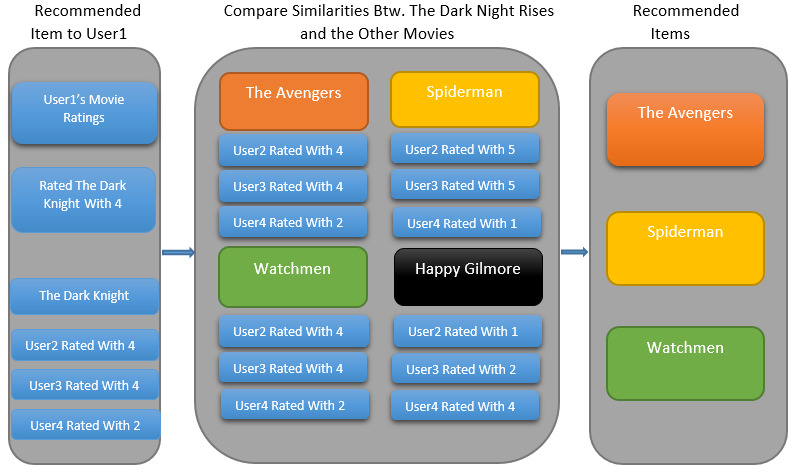

- ## Item Based Collaborative Filtering

Item-item collaborative filtering, or item-based, or item-to-item, is a form of collaborative filtering for recommender systems based on the similarity between items calculated using people's ratings of those items. The system executes a model-building stage by finding the similarity between all pairs of items. This similarity function can take many forms, such as correlation between ratings or cosine of those rating vectors. It uses the most similar items to a user's already-rated items to generate a list of recommendations.For more clarity look at the example given below:

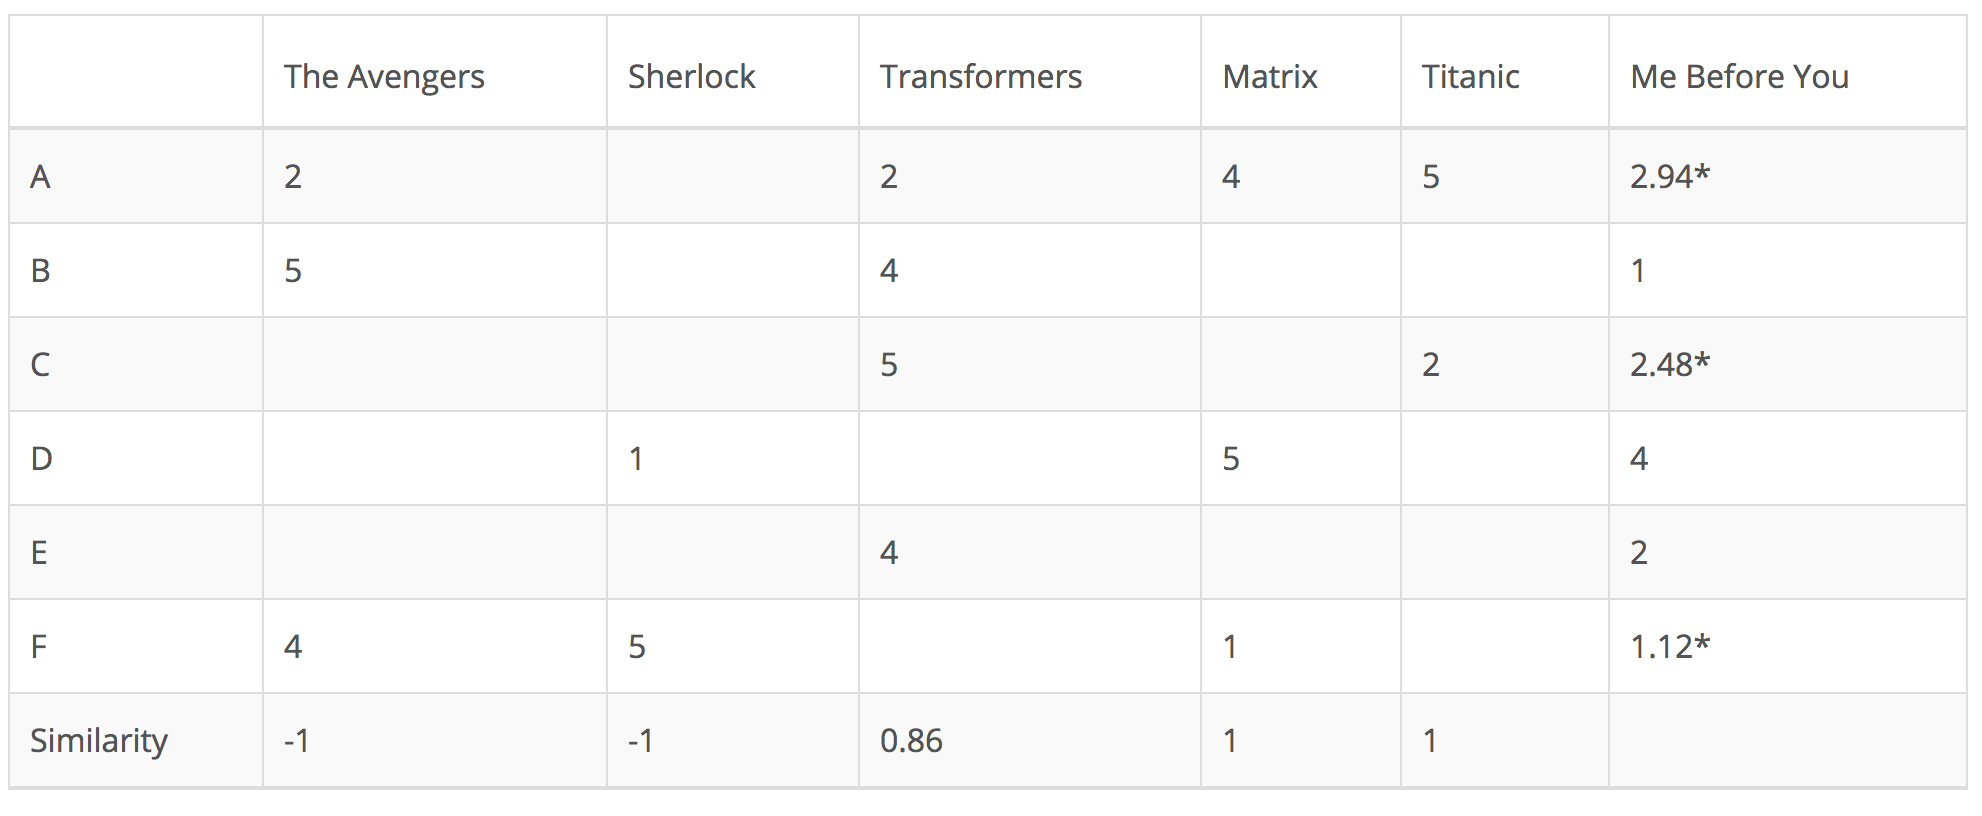


# Problems of Collaborative Filtering Model

- ## Scale
- ## Sparse Data
- ## Cold Start
- ## Popularity Bias
- ## Hacking

# Machine learning
Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use in order to perform a specific task effectively without using explicit instructions, relying on patterns and inference instead. It is seen as a subset of artificial intelligence. 

# Types of Machine Learning Algorithm
The types of machine learning algorithms differ in their approach, the type of data they input and output, and the type of task or problem that they are intended to solve.


- ## Supervised learning
Supervised learning algorithms build a mathematical model of a set of data that contains both the inputs and the desired outputs.The data is known as training data, and consists of a set of training examples. Each training example has one or more inputs and a desired output, also known as a supervisory signal.<br>**Supervised learning algorithms include:**
   -  ### Classification:
       Learning where a training set of correctly identified observations is available.the individual observations are analyzed into a set of quantifiable properties, known variously as explanatory variables or features. These properties may variously be categorical (e.g. "A", "B", "AB" or "O", for blood type), ordinal (e.g. "large", "medium" or "small"), integer-valued (e.g. the number of occurrences of a particular word in an email) or real-valued (e.g. a measurement of blood pressure). 
   -  ### Regression:
       It's a set of statistical processes for estimating the relationships among variables. It includes many techniques for modeling and analyzing several variables, when the focus is on the relationship between a dependent variable and one or more independent variables (or 'predictors'). 
- ## Unsupervised learning
Unsupervised learning algorithms take a set of data that contains only inputs, and find structure in the data, like grouping or clustering of data points. The algorithms therefore learn from test data that has not been labeled, classified or categorized. Unsupervised learning algorithms identify commonalities in the data and react based on the presence or absence of such commonalities in each new piece of data. 
- ## Semi-supervised learning
Semi-supervised learning is a class of machine learning tasks and techniques that also make use of unlabeled data for training – typically a small amount of labeled data with a large amount of unlabeled data. Semi-supervised learning falls between unsupervised learning and supervised learning.
- ##  Reinforcement learning
Reinforcement learning (RL) is an area of machine learning concerned with how software agents ought to take actions in an environment so as to maximize some notion of cumulative reward.In this model, the focus is on finding a balance between exploration (of uncharted territory) and exploitation (of current knowledge).

# Algorithm Selection
- Categorize the problem:Categorize by the input or Categorize by output
- Understand the Data: Analyse,Process and Transform data.
- Idenftify available algorithms:Identify the algorithms that are applicable and practical to implement in a reasonable time.
- Implement Machine Learning Algorithm:Set up a machine learning pipeline that compares the performance of each algorithm. 
- Optimize hyperparameters:Three options for optimizing hyperparameters, grid search, random search, and Bayesian optimization.

# Feature engineering

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work.This step involves the art and science of transforming raw data into features that better represent a pattern to the learning algorithms. 

# Model Preparation
To prepare data for builidng efficient models that provide high accuracy.
## Splitting data into training and evaluation sets
Split the data into two sets, one for training the algorithm, and another for evaluation purposes. Non-overlapping subsets of the data must be selected for the training and evaluation sets in order to ensure proper testing.
### Training dataset:
    A training dataset is a dataset of examples used for learning, that is to fit the parameters.
### Test dataset:
    A test dataset is a dataset that is independent of the training dataset, but that follows the same probability distribution as the training dataset.A test set is therefore a set of examples used only to assess the performance.

# Machine Learning Model
The term ML model refers to the model artifact that is created by the training process.The ML model is used for getting predictions on new data for which the target is not known. 

# Model Selection Criteria
- Accuracy
- Interpretability
- Complexity
- Scalability
- Time to build, train, and test
- Time make predictions 
- Business goal achievement

# Latent Factor Model

It describes a property or concept that a user or an item have.It can handle the scalability and sparsity issue created by collaborative filtering system.


## Single Value Decomposition

It's a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler.It's an unsupervised learning algorithm.SVD is the factorization of a matrix into 3 matrices.The SVD of matrix A:
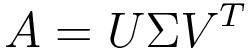
- Where A is an m x n matrix, 
- U is an (m x m) orthogonal matrix, 
- 𝚺 is an (m x n) nonnegative rectangular diagonal matrix, and 
- V is an (n x n) orthogonal matrix.
- U is also referred to as the left singular vectors, 
- 𝚺 the singular values, and V the right singular vectors
#### The SVD can be calculated by calling the svd() function from surprise library.


#### We will load a new data set which has the feature 'userid' which we will require for this model.

In [40]:
from surprise import Reader, Dataset, SVD, evaluate
reader = Reader()
ratings = pd.read_csv('C:/Users/KEN/Downloads/tmdb_dataset/ratings_small.csv')
#The new data:
ratings.head()

userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

In [41]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
data.split(n_folds=5)


In [42]:
svd = SVD()

# Machine Learning Model Accuracy
Machine learning model accuracy is the measurement used to determine which model is best at identifying relationships and patterns between variables in a dataset based on the input, or training, data.There are many ways of measuring a model’s accuracy.
### Some of them are:

1. #### Mean Absolute Error (MAE):
    MAE is the average of the absolute difference between the predicted values and observed value:<br>**Prediction Error**=(Actual Value - Predicted Value).<br>**Absolute Error**=|Prediction Error|.<br>**MAE** = Average of All absolute errors

2. #### Root Mean Square Error (RMSE):
    It represents the sample standard deviation of the differences between predicted values and observed values.
    ##### Formula:
    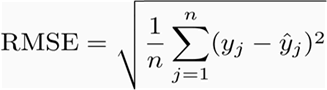


In [43]:

evaluate(svd, data, measures=['RMSE', 'MAE'])


F:\Anaconda\lib\site-packages\surprise\evaluate.py:66: UserWarning:

The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.

F:\Anaconda\lib\site-packages\surprise\dataset.py:193: UserWarning:

Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 



Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.8994
MAE:  0.6913
------------
Fold 2
RMSE: 0.9013
MAE:  0.6934
------------
Fold 3
RMSE: 0.8889
MAE:  0.6848
------------
Fold 4
RMSE: 0.8969
MAE:  0.6892
------------
Fold 5
RMSE: 0.8991
MAE:  0.6940
------------
------------
Mean RMSE: 0.8971
Mean MAE : 0.6905
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [0.8993538113839926,
                             0.9012900780368533,
                             0.8888601768911845,
                             0.8968581106179707,
                             0.8990933242702671],
                            'mae': [0.6912881259405342,
                             0.693409203403905,
                             0.6847649287758713,
                             0.6892295087904046,
                             0.693996515726122]})

## Dataset Training


In [44]:
trainset = data.build_full_trainset()
svd.fit(trainset)

# Model Validation
Model validation is referred to as the process where a trained model is evaluated with a testing data set.

# Prediction

In [45]:
svd.predict(1, 32, 3)

Prediction(uid=1, iid=32, r_ui=3, est=2.962013772236485, details={'was_impossible': False})

### For user 1, the prediction value=2.86, for the movie with id=32

In [46]:
svd.predict(2,32,3)

Prediction(uid=2, iid=32, r_ui=3, est=3.8786872892525976, details={'was_impossible': False})

### For user 2, the prediction value=3.75, for the movie with id=32

# Some Data Visualization for better analysis of the data

In [47]:
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

### Below is a KDE plot depicting Average Vote Count of users for each movie.

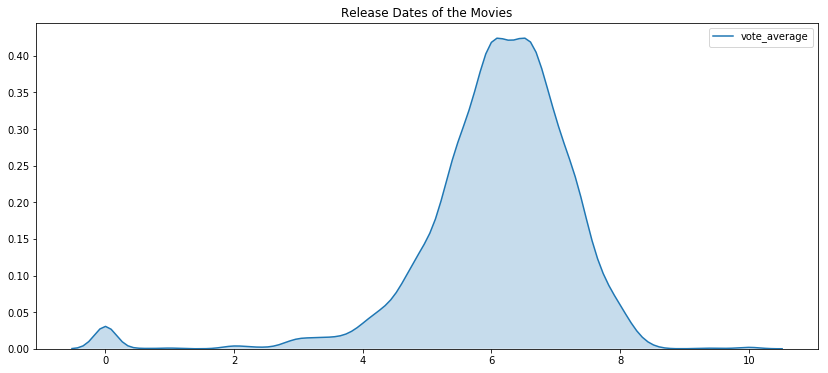

In [48]:
plt.figure(figsize=(14,6))
plt.title("Release Dates of the Movies")
sns.kdeplot(data=tmdb_Movies.vote_average,shade=True)

### Below is a plot showing revenue of top 10 movies grouped according to director. Popularity of the movie can be seen upon hovering.

In [49]:
sorted_Rev=tmdb_Movies.sort_values('revenue',ascending=False)
top_Rev=sorted_Rev.head(10)
fig = px.bar(top_Rev, x="title", y="revenue",color='director',orientation='v',
             hover_data=["popularity"],
             height=500,
             title='')
fig.show()

### The bar plot below show movies with maximum budget in the data set (top 10)

In [50]:
sorted_Budg=tmdb_Movies.sort_values('budget',ascending=False)
top_Budg=sorted_Budg.head(10)
top_Budg=top_Budg.sort_values('budget',ascending=True)
fig = go.Figure(go.Bar(
            x=top_Budg['budget'],
            y=top_Budg['title'],
            orientation='h',marker=dict(
        color='Brown', #Bar Color
        )))
fig.update_layout(
    
    title=go.layout.Title(
        text="Top Budget Movies",
        xref="paper",
        x=0),

    barmode='group',
    paper_bgcolor='White',
    plot_bgcolor='White',
    margin=dict(l=100, r=20, t=140, b=90),
    showlegend=False,
)
fig.show()


# Histogram depicting the distribution of 'Vote Average' data:

In [51]:
fig = px.histogram(tmdb_Movies, x="vote_average",nbins=40)
fig.show()